#S223090226
#SHREYAS VIVEK
#SIT719 5.2D 2

In [24]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
from time import time


In [25]:
# %matplotlib inline
warnings.filterwarnings('ignore')

import pandas as pd

import io


In [27]:
dataset = cdataset.dropna()



In [26]:
cdataset = pd.read_csv('Processed_Combined_IoT_dataset.csv')

In [28]:
dataset.head()


,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [29]:
print(dataset.shape)



(401119, 18)


In [30]:
print(list(dataset.columns))



['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [31]:
target_cols=list(dataset.columns[-1:])
target_cols


['label']

In [32]:

feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

In [33]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

X.head()



,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test



In [36]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


In [37]:
# Define a list of classifier classes
classifiers = [
    DecisionTreeClassifier,
    RandomForestClassifier,
    KNeighborsClassifier,
    LogisticRegression,
    GaussianNB,
]


In [38]:
def evaluate_classifier(class_type, train_x, train_Y, test_x, test_Y, label_names=None, **kwargs):
    start_time = time()  # Record the start time for training

    if class_type == 'DecisionTree':
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**kwargs)
    elif class_type == 'RandomForest':
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**kwargs)
    elif class_type == 'KNeighbors':
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**kwargs)
    elif class_type == 'LogisticRegression':
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**kwargs)
    elif class_type == 'NaiveBayes':
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**kwargs)
    else:
        raise ValueError(f"Unsupported classifier type: {class_type}")

    classifier.fit(train_x, train_Y)
    training_time = time() - start_time  # Calculate training time

    start_time = time()  # Record the start time for testing
    y_pred = classifier.predict(test_x)
    testing_time = time() - start_time  # Calculate testing time

    class_name = class_type
    print(f"Classifier: {class_name}")
    print(f"Evaluation Report for {class_name}:")
    show_evaluation_results(test_Y, y_pred, label_names, training_time, testing_time)
    print("=" * 40)


In [39]:
label_names = list(map(str, np.unique(y_test)))
performance_metrics = []

In [40]:
def show_evaluation_results(test_Y, y_pred, label_names, training_time, testing_time):
    accuracy = accuracy_score(test_Y, y_pred)
    conf_matx = confusion_matrix(test_Y, y_pred)
    f1score = f1_score(test_Y, y_pred, average="macro")
    precision = precision_score(test_Y, y_pred, average="macro")
    recall = recall_score(test_Y, y_pred, average="macro")

    print(f"F-Score: {f1score}")
    print(f"Precision: {precision}")
    print(f"Re-call: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matx}")

    clrp = classification_report(test_Y, y_pred, target_names=label_names)
    print(clrp)

    class_far = calculate_false_alarm_rate(conf_matx, label_names)
    for label_name, false_alarm in class_far.items():
        print(f"False Alarm of {label_name}: {false_alarm:.4f} ({false_alarm * 100:.2f}%)")

    overall_far = sum(class_far.values()) / len(class_far)
    print(f"Overall False Alarm Rate: {overall_far:.4f} ({overall_far * 100:.2f}%)")

    # Add training time, testing time, and error rate to the report
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Testing Time: {testing_time:.2f} seconds")
    error_rate = 1 - accuracy
    print(f"Error Rate: {error_rate:.4f} ({error_rate * 100:.2f}%)")

    # Create the heatmap using Matplotlib
    plt.imshow(conf_matx, interpolation='nearest', cmap='plasma')
    plt.title("Confusion Matrix")
    plt.colorbar()

    # Label the axes with numbers
    for i in range(len(label_names)):
        for j in range(len(label_names)):
            plt.text(j, i, str(conf_matx[i, j]), ha='center', va='center', color='white')

    # Label the axes
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(np.arange(len(label_names)), label_names, rotation=45)
    plt.yticks(np.arange(len(label_names)), label_names)

    # Append performance metrics to the list
    performance_metrics.append({
        'F-Score': f1score,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'Overall FAR': overall_far,
        'Training Time': training_time,
        'Testing Time': testing_time,
        'Error Rate': error_rate
    })

    plt.show()

In [41]:
def calculate_false_alarm_rate(conf_matx, label_names):
    class_far = {}
    for i, label_name in enumerate(label_names):
        TP = conf_matx[i, i]
        FP = np.sum(conf_matx[:, i]) - TP
        FN = np.sum(conf_matx[i, :]) - TP
        TN = np.sum(conf_matx) - TP - FP - FN
        false_alarm = FP / (FP + TN)
        class_far[label_name] = false_alarm
    return class_far

In [42]:
classifiers = [
    ('DecisionTree', DecisionTreeClassifier(random_state=17)),
    ('RandomForest', RandomForestClassifier(random_state=17)),
    ('KNeighbors', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('NaiveBayes', GaussianNB()),
]

Classifier: DecisionTree
Evaluation Report for DecisionTree:
F-Score: 0.8525692434440942
Precision: 0.8723593011949231
Re-call: 0.8423223263765083
Accuracy: 0.8648035500598324
Confusion Matrix:
[[69366  4129]
 [12140 34701]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.86    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.86      0.86    120336

False Alarm of 0: 0.2592 (25.92%)
False Alarm of 1: 0.0562 (5.62%)
Overall False Alarm Rate: 0.1577 (15.77%)
Training Time: 2.82 seconds
Testing Time: 0.04 seconds
Error Rate: 0.1352 (13.52%)


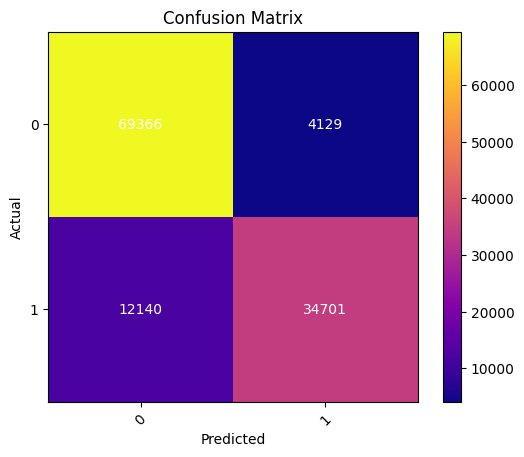

Classifier: RandomForest
Evaluation Report for RandomForest:
F-Score: 0.8575753566044748
Precision: 0.8795038472236436
Re-call: 0.8465540469126652
Accuracy: 0.8697314186943226
Confusion Matrix:
[[69908  3587]
 [12089 34752]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336

False Alarm of 0: 0.2581 (25.81%)
False Alarm of 1: 0.0488 (4.88%)
Overall False Alarm Rate: 0.1534 (15.34%)
Training Time: 69.41 seconds
Testing Time: 3.87 seconds
Error Rate: 0.1303 (13.03%)


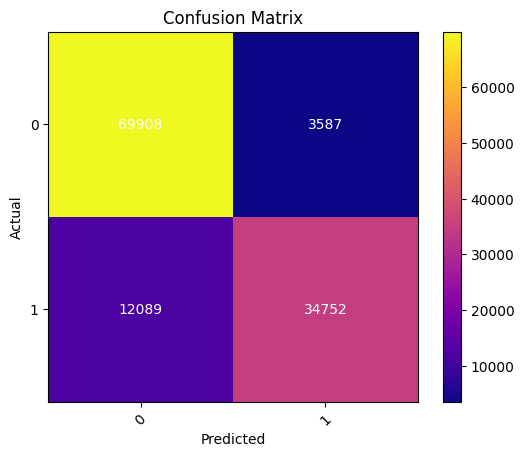

Classifier: KNeighbors
Evaluation Report for KNeighbors:
F-Score: 0.8188954292131032
Precision: 0.8471684784464781
Re-call: 0.8072729637735185
Accuracy: 0.8362667863316049
Confusion Matrix:
[[68951  4544]
 [15159 31682]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87     73495
           1       0.87      0.68      0.76     46841

    accuracy                           0.84    120336
   macro avg       0.85      0.81      0.82    120336
weighted avg       0.84      0.84      0.83    120336

False Alarm of 0: 0.3236 (32.36%)
False Alarm of 1: 0.0618 (6.18%)
Overall False Alarm Rate: 0.1927 (19.27%)
Training Time: 0.05 seconds
Testing Time: 184.40 seconds
Error Rate: 0.1637 (16.37%)


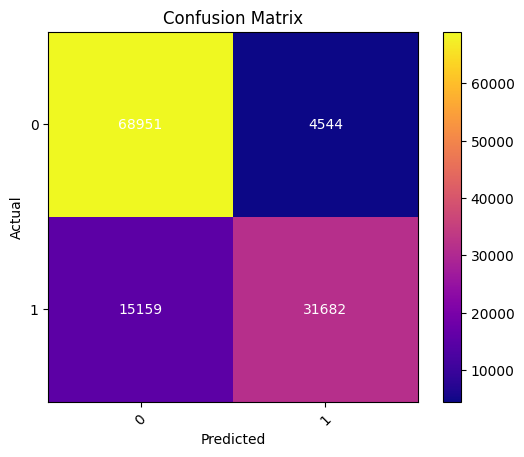

Classifier: LogisticRegression
Evaluation Report for LogisticRegression:
F-Score: 0.582669930370106
Precision: 0.7631321356723366
Re-call: 0.606567843050947
Accuracy: 0.6881814253423747
Confusion Matrix:
[[71660  1835]
 [35688 11153]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.79     73495
           1       0.86      0.24      0.37     46841

    accuracy                           0.69    120336
   macro avg       0.76      0.61      0.58    120336
weighted avg       0.74      0.69      0.63    120336

False Alarm of 0: 0.7619 (76.19%)
False Alarm of 1: 0.0250 (2.50%)
Overall False Alarm Rate: 0.3934 (39.34%)
Training Time: 3.63 seconds
Testing Time: 0.01 seconds
Error Rate: 0.3118 (31.18%)


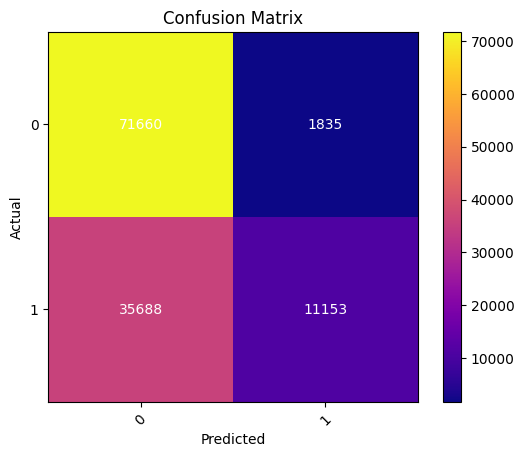

Classifier: NaiveBayes
Evaluation Report for NaiveBayes:
F-Score: 0.6267736069629253
Precision: 0.7258680092392289
Re-call: 0.6329013889860161
Accuracy: 0.6998819970748571
Confusion Matrix:
[[68740  4755]
 [31360 15481]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.79     73495
           1       0.77      0.33      0.46     46841

    accuracy                           0.70    120336
   macro avg       0.73      0.63      0.63    120336
weighted avg       0.72      0.70      0.66    120336

False Alarm of 0: 0.6695 (66.95%)
False Alarm of 1: 0.0647 (6.47%)
Overall False Alarm Rate: 0.3671 (36.71%)
Training Time: 0.13 seconds
Testing Time: 0.03 seconds
Error Rate: 0.3001 (30.01%)


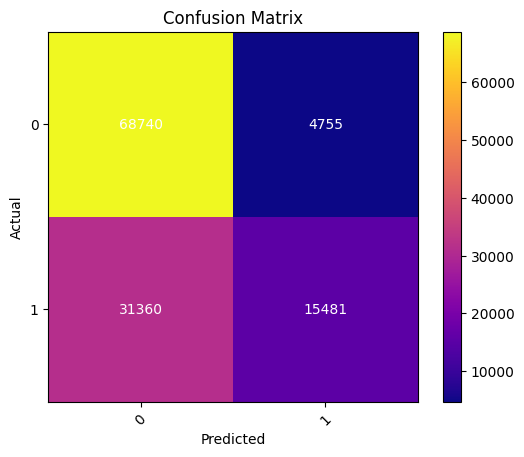

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [43]:
for classifier_name, _ in classifiers:
    evaluate_classifier(class_type=classifier_name, train_x=X_train, train_Y=y_train, test_x=X_test, test_Y=y_test, label_names=label_names)
metrics_names = ['F-Score', 'Precision', 'Recall', 'Accuracy', 'Overall FAR', 'Training Time', 'Testing Time', 'Error Rate']
metrics_values = [list(metric.values()) for metric in performance_metrics]

plt.figure(figsize=(12, 12))  # Increase the figure size to accommodate additional charts



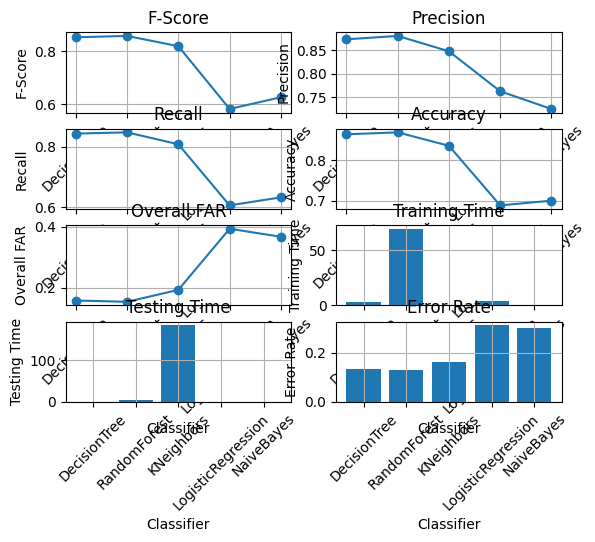

In [44]:
for i, metric_name in enumerate(metrics_names):
    plt.subplot(4, 2, i + 1)

    # Special handling for Time and Error Rate metrics
    if metric_name in ['Training Time', 'Testing Time', 'Error Rate']:
        plt.bar([classifier[0] for classifier in classifiers], [values[i] for values in metrics_values])
    else:
        plt.plot([classifier[0] for classifier in classifiers], [values[i] for values in metrics_values], marker='o')

    plt.title(metric_name)
    plt.xlabel('Classifier')
    plt.xticks(rotation=45)
    plt.ylabel(metric_name)
    plt.grid(True)

plt.tight_layout()
plt.show()